In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("Admission_Predict.csv",na_values=["?","NA"])
test = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Train

In [5]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
train.shape

(400, 9)

In [7]:
train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Data Preprocessing

In [9]:
train.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
train.drop(["Serial No."],axis=1,inplace=True)

In [11]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# EDA

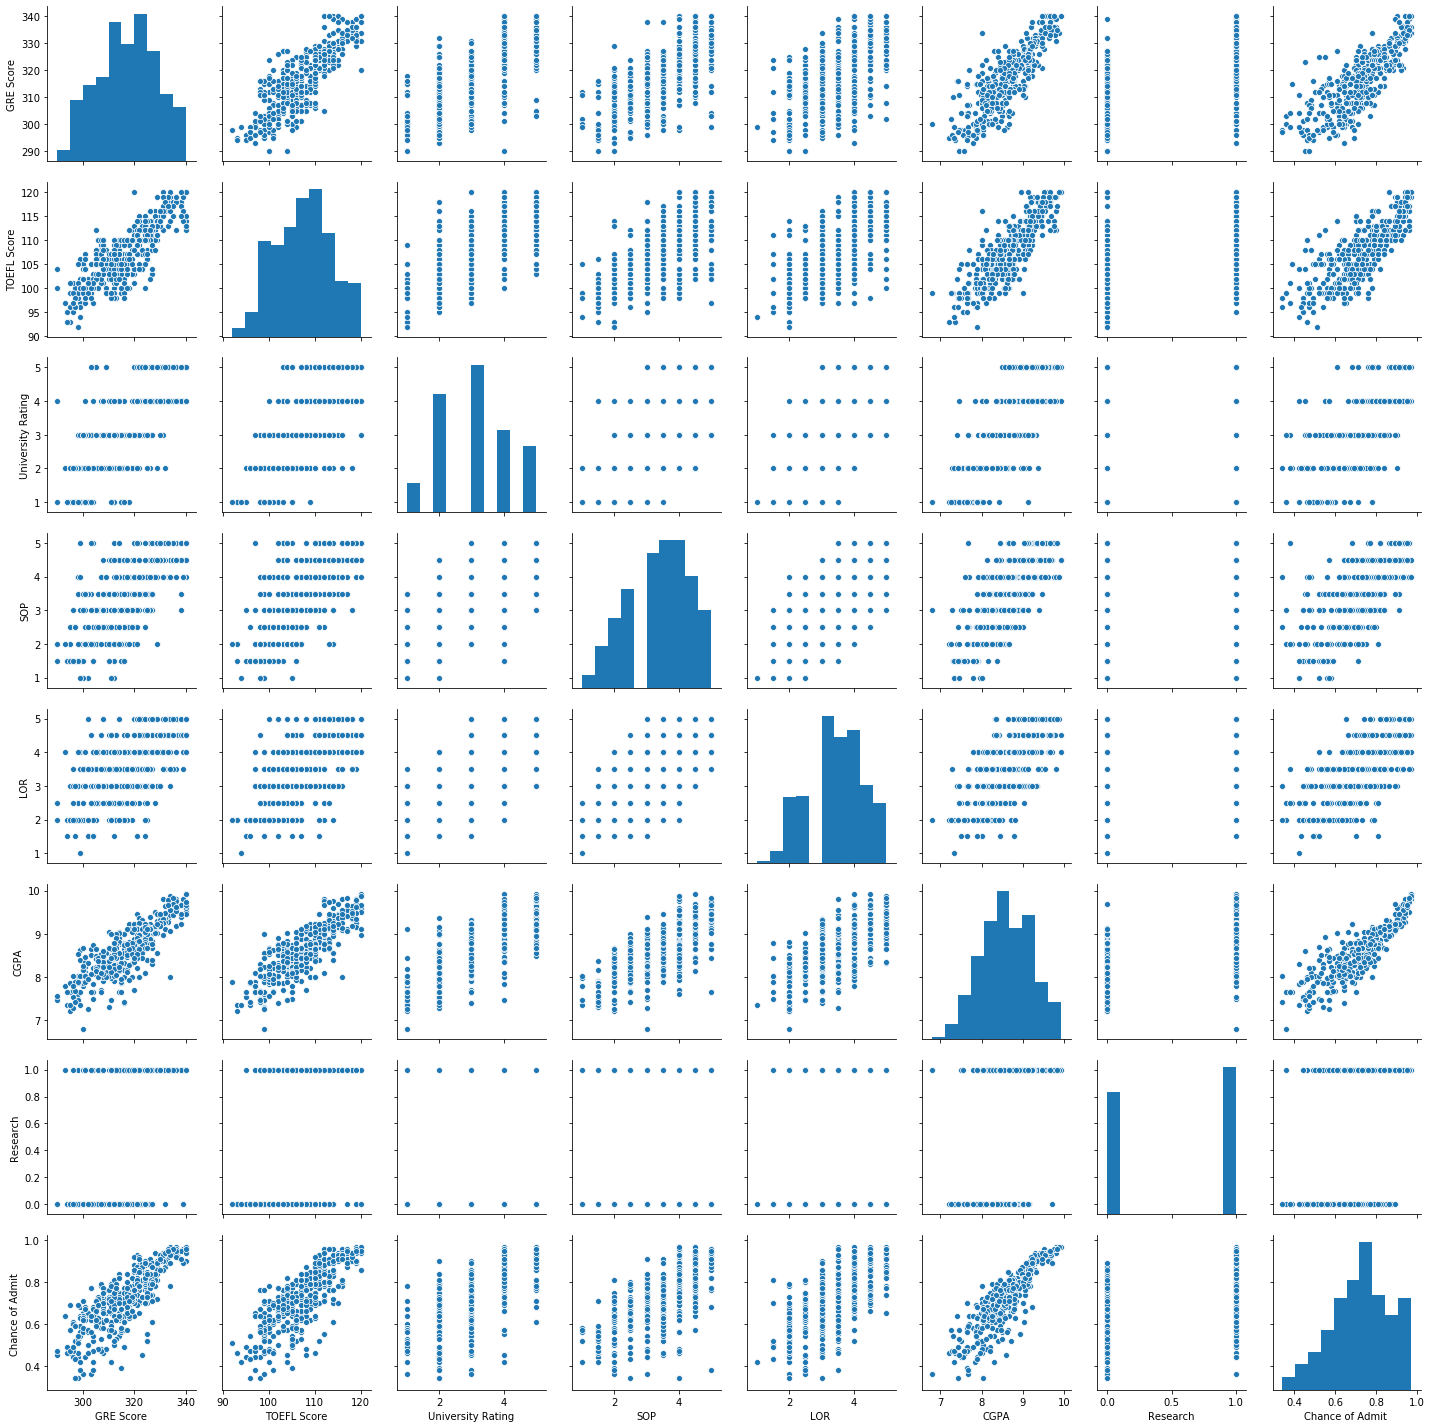

In [12]:
sns.pairplot(train)

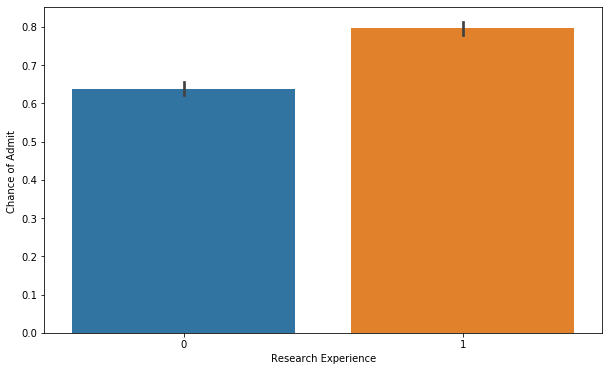

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(train["Research"],train["Chance of Admit "])
plt.xlabel("Research Experience")
plt.show()

# Having an experience in research gives somewhat more chances for admission than not having any experience

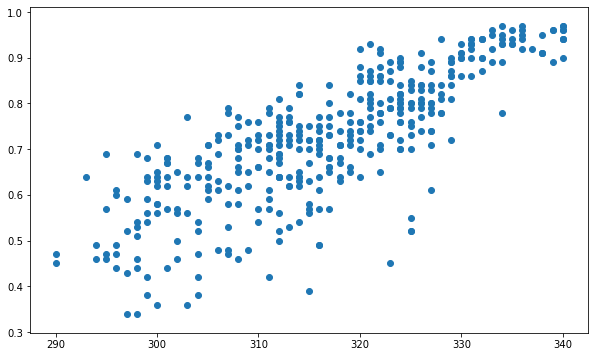

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(train["GRE Score"],train["Chance of Admit "])
plt.show()

<Figure size 720x432 with 0 Axes>

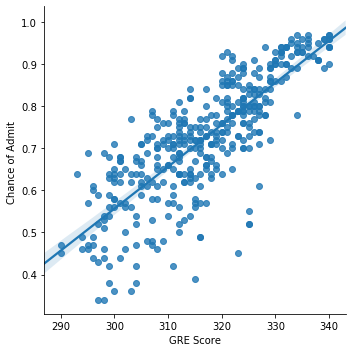

In [15]:
plt.figure(figsize=(10,6))
sns.lmplot("GRE Score","Chance of Admit ",data=train)
plt.show()

# so we can see that as the GRE Score is increasing the chances of getting admission is also increasing

<Figure size 720x432 with 0 Axes>

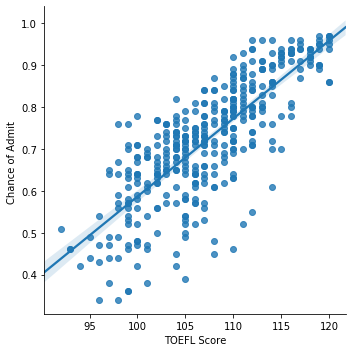

In [16]:
plt.figure(figsize=(10,6))
sns.lmplot("TOEFL Score","Chance of Admit ",data=train)
plt.show()

# So we can see that like wise GRE Score having more marks in TOEFL Score also increases chances of admission

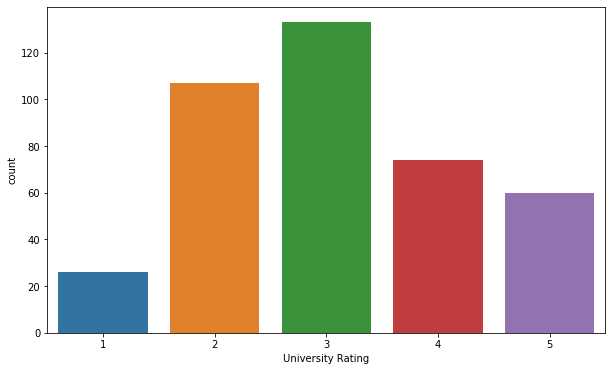

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(train["University Rating"])
plt.show()

# So we can see that maximum universities in India have rating 3 and the no. of univerities having rating 5 are few compared to 
# others. Very less colleges have rating 1. Maximum colleges having rating 2-3

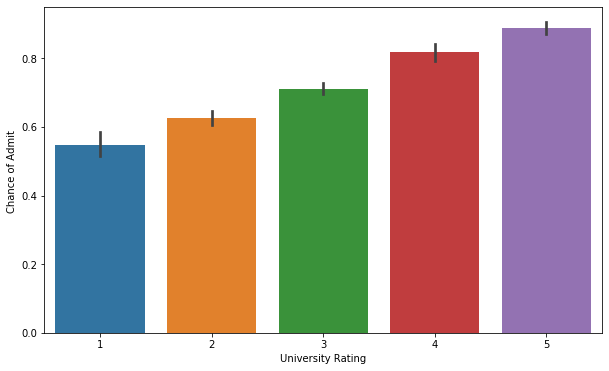

In [18]:
plt.figure(figsize=(10,6))
sns.barplot("University Rating","Chance of Admit ",data=train)
plt.show()

# As expected,students studying in colleges with rating 5 have highest chances of getting admitted in higher studies as compared
# to other colleges. As the rating of colleges is decreasing the chances of students getting admitted is also decreasing

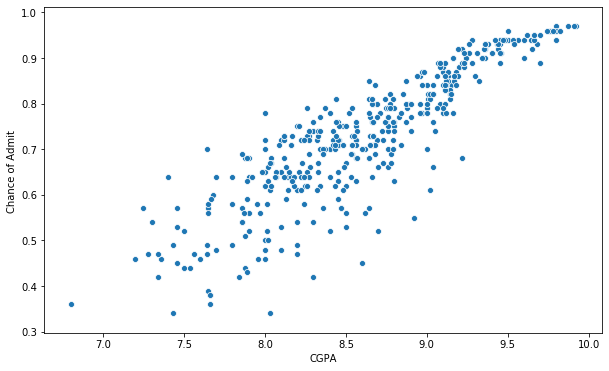

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot("CGPA","Chance of Admit ",data=train)
plt.show()

<Figure size 720x432 with 0 Axes>

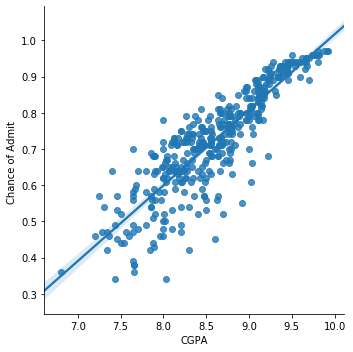

In [20]:
plt.figure(figsize=(10,6))
sns.lmplot("CGPA","Chance of Admit ",data=train)
plt.show()

# As we can see it is clear that as the cgpa of student is higher his respective chances of admission is also higher. Hence we 
# can conclude that to get into higher admission easily you need to have a good cgpa in your undergrad

<Figure size 720x432 with 0 Axes>

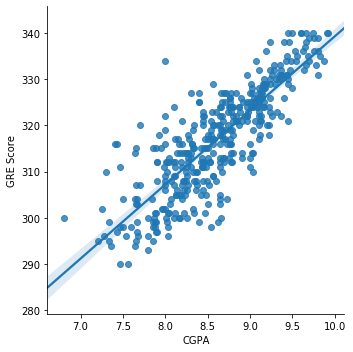

In [21]:
plt.figure(figsize=(10,6))
sns.lmplot("CGPA","GRE Score",data=train)
plt.show()

# Here we can observe that good cgpa holders perform very good in GRE exams. They have much higher scores than those having
# less cgpa.

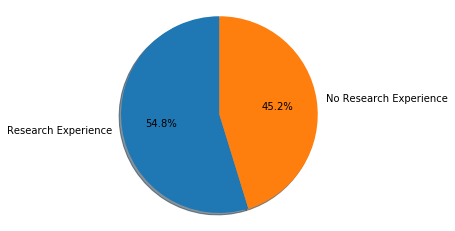

In [22]:
labels = "Research Experience","No Research Experience"
sizes = [219,181] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Feature Selection

In [23]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


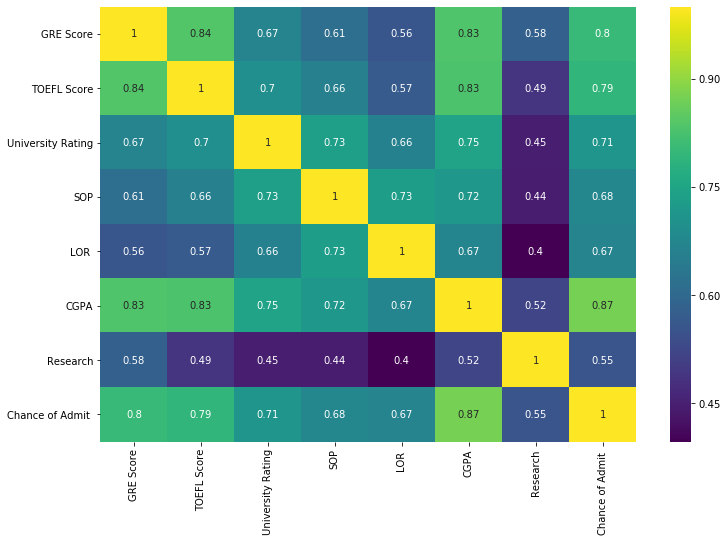

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,cmap="viridis")
plt.show()

In [25]:
def getCorrelatedFeature(corrdata,threshold):
    feature= []
    value= []
    
    for i ,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df= pd.DataFrame(data= value, index= feature,columns=["Corr Value"])   
    
    return df

In [26]:
threshold= 0.70
corr_value= getCorrelatedFeature(train.corr()["Chance of Admit "],threshold)
corr_value

,Corr Value
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
CGPA,0.873289
Chance of Admit,1.000000


In [27]:
corr_value.index.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA',
       'Chance of Admit '], dtype=object)

In [28]:
correlated_data= train[corr_value.index]

In [29]:
correlated_data.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit
0,337,118,4,9.65,0.92
1,324,107,4,8.87,0.76
2,316,104,3,8.00,0.72
3,322,110,3,8.67,0.80
4,314,103,2,8.21,0.65


In [30]:
X= correlated_data.iloc[:,:-1]

In [31]:
y= correlated_data.iloc[:,-1]

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [33]:
sl= SelectFromModel(Lasso(alpha=0.005))

In [34]:
selected_feat= sl.fit_transform(X,y)

In [35]:
selected_feat

array([[337.  , 118.  ,   4.  ,   9.65],
       [324.  , 107.  ,   4.  ,   8.87],
       [316.  , 104.  ,   3.  ,   8.  ],
       ...,
       [330.  , 116.  ,   4.  ,   9.45],
       [312.  , 103.  ,   3.  ,   8.78],
       [333.  , 117.  ,   4.  ,   9.66]])

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mn= MinMaxScaler()

In [38]:
X= mn.fit_transform(X)

In [39]:
X

array([[0.94      , 0.92857143, 0.75      , 0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.38461538],
       ...,
       [0.8       , 0.85714286, 0.75      , 0.84935897],
       [0.44      , 0.39285714, 0.5       , 0.63461538],
       [0.86      , 0.89285714, 0.75      , 0.91666667]])

In [40]:
X.shape,y.shape

((400, 4), (400,))

# Machine Learning Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost

In [42]:
lr= LinearRegression()
dt= DecisionTreeRegressor()
rb= RandomForestRegressor()
kn= KNeighborsRegressor()
xg= xgboost.XGBRegressor()
sv= SVR()

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
cross_val_score(lr,X,y,cv=5,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


array([-0.07162404, -0.05619236, -0.04607198, -0.03248547, -0.04882394])

In [46]:
dt.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
score_dt=cross_val_score(dt,X,y,cv=5,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [48]:
np.mean(score_dt)

-0.06845

In [49]:
rb.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
score_rb=cross_val_score(rb,X,y,cv=5,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [51]:
np.mean(score_rb)

-0.054946499999999995

In [52]:
kn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [53]:
score_kn=cross_val_score(kn,X,y,cv=5,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [54]:
np.mean(score_kn)

-0.05794499999999999

In [55]:
xg.fit(X,y)

[00:49:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
score_xg=cross_val_score(xg,X,y,cv=5,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [57]:
np.mean(score_xg)

-0.05287138658761977

In [58]:
sv.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Model Testing

In [59]:
test = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [60]:
test.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [61]:
test.drop(["Serial No.","SOP","LOR ","Research"],axis=1,inplace=True)

In [62]:
test.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit
0,337,118,4,9.65,0.92
1,324,107,4,8.87,0.76
2,316,104,3,8.00,0.72
3,322,110,3,8.67,0.80
4,314,103,2,8.21,0.65


In [63]:
X_test= test.iloc[:,:-1]

In [64]:
y_test= test.iloc[:,-1]

In [65]:
X_test= mn.fit_transform(X_test)

In [66]:
X_test

array([[0.94      , 0.92857143, 0.75      , 0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.38461538],
       ...,
       [0.8       , 1.        , 1.        , 0.88461538],
       [0.44      , 0.39285714, 0.75      , 0.5224359 ],
       [0.74      , 0.75      , 0.75      , 0.71794872]])

In [67]:
rb.score(X_test,y_test)

0.9410792500194812

In [68]:
xg.score(X_test,y_test)

0.8734335548581134

In [69]:
lr.score(X_test,y_test)

0.8090667433603478

In [70]:
dt.score(X_test,y_test)

0.9246508148747782

In [71]:
kn.score(X_test,y_test)

0.8309606924527742

In [72]:
sv.score(X_test,y_test)

0.7405603283626578

In [73]:
# Hence we select Random Forest As Our Best Model

Predictions with random forest

In [74]:
y_pred= rb.predict(X_test)

In [76]:
y_pred_df= pd.DataFrame(data=y_pred,columns=["Prediction"])

In [77]:
y_pred_df

,Prediction
0,0.9300
1,0.7779
2,0.6690
3,0.7756
4,0.6404
...,...
495,0.8275
496,0.9627
497,0.9407
498,0.7039


In [78]:
X_test= mn.inverse_transform(X_test)

In [85]:
X_test= pd.DataFrame(data=X_test,columns=["GRE Score","TOEFL Score","University Rating","CGPA"])

In [87]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,CGPA
0,337.0,118.0,4.0,9.65
1,324.0,107.0,4.0,8.87
2,316.0,104.0,3.0,8.00
3,322.0,110.0,3.0,8.67
4,314.0,103.0,2.0,8.21


In [90]:
output= pd.concat([X_test,y_test,y_pred_df],axis=1)

In [92]:
output.head(10)

,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit,Prediction
0,337.0,118.0,4.0,9.65,0.92,0.9300
1,324.0,107.0,4.0,8.87,0.76,0.7779
2,316.0,104.0,3.0,8.00,0.72,0.6690
3,322.0,110.0,3.0,8.67,0.80,0.7756
4,314.0,103.0,2.0,8.21,0.65,0.6404
5,330.0,115.0,5.0,9.34,0.90,0.9085
6,321.0,109.0,3.0,8.20,0.75,0.7288
7,308.0,101.0,2.0,7.90,0.68,0.6296
8,302.0,102.0,1.0,8.00,0.50,0.5240
9,323.0,108.0,3.0,8.60,0.45,0.5673
